### PDF
The derivative of a CDF is called a probability density function, or PDF.
For example, the PDF of an exponential distribution is PDFexpo(x) = $λe^{−λx}$
Evaluating a PDF for a particular value of x is usually not useful. The result is not a probability; it is a probability density.
In physics, density is mass per unit of volume; in order to get a mass, you have to multiply by volume or, if the density is not constant, you have to integrate over volume.
Similarly, probability density measures probability per unit of x. In order to get a probability mass, you have to integrate over x.
Again, a probability density doesn’t mean much by itself. But if we plot the Pdf, we can see the shape of the distribution:
PDF estimated from a sample, which we’ll compute in the next section.

### Kernel density estimation

Kernel density estimation (KDE) is an algorithm that takes a sample and finds an appropriately smooth PDF that fits the data.
Estimating a density function with KDE is useful for several purposes:
• Visualization: During the exploration phase of a project, CDFs are usually the best visualization of a distribution. After you look at a CDF, you can decide whether an estimated PDF is an appropriate model of the distribution. If so, it can be a better choice for presenting the distribution to an audience that is unfamiliar with CDFs.
• Interpolation: An estimated PDF is a way to get from a sample to a model of the population. If you have reason to believe that the population distribution is smooth, you can use KDE to interpolate the density for values that don’t appear in the sample.
• Simulation: Simulations are often based on the distribution of a sample. If the sample size is small, it might be appropriate to smooth the sample distribution using KDE, which allows the simulation to explore more possible outcomes, rather than replicating the observed data.

At this point we have seen PMFs, CDFs and PDFs; let’s take a minute to review. Figure 6.2 shows how these functions relate to each other.

We started with PMFs, which represent the probabilities for a discrete set of values. To get from a PMF to a CDF, you add up the probability masses to get cumulative probabilities. To get from a CDF back to a PMF, you compute differences in cumulative probabilities. We’ll see the implementation of these operations in the next few sections.
A PDF is the derivative of a continuous CDF; or, equivalently, a CDF is the integral of a PDF. Remember that a PDF maps from values to probability densities; to get a probability, you have to integrate.
To get from a discrete to a continuous distribution, you can perform various kinds of smoothing. One form of smoothing is to assume that the data come from an analytic continuous distribution (like exponential or normal) and to estimate the parameters of that distribution. Another option is kernel density estimation.

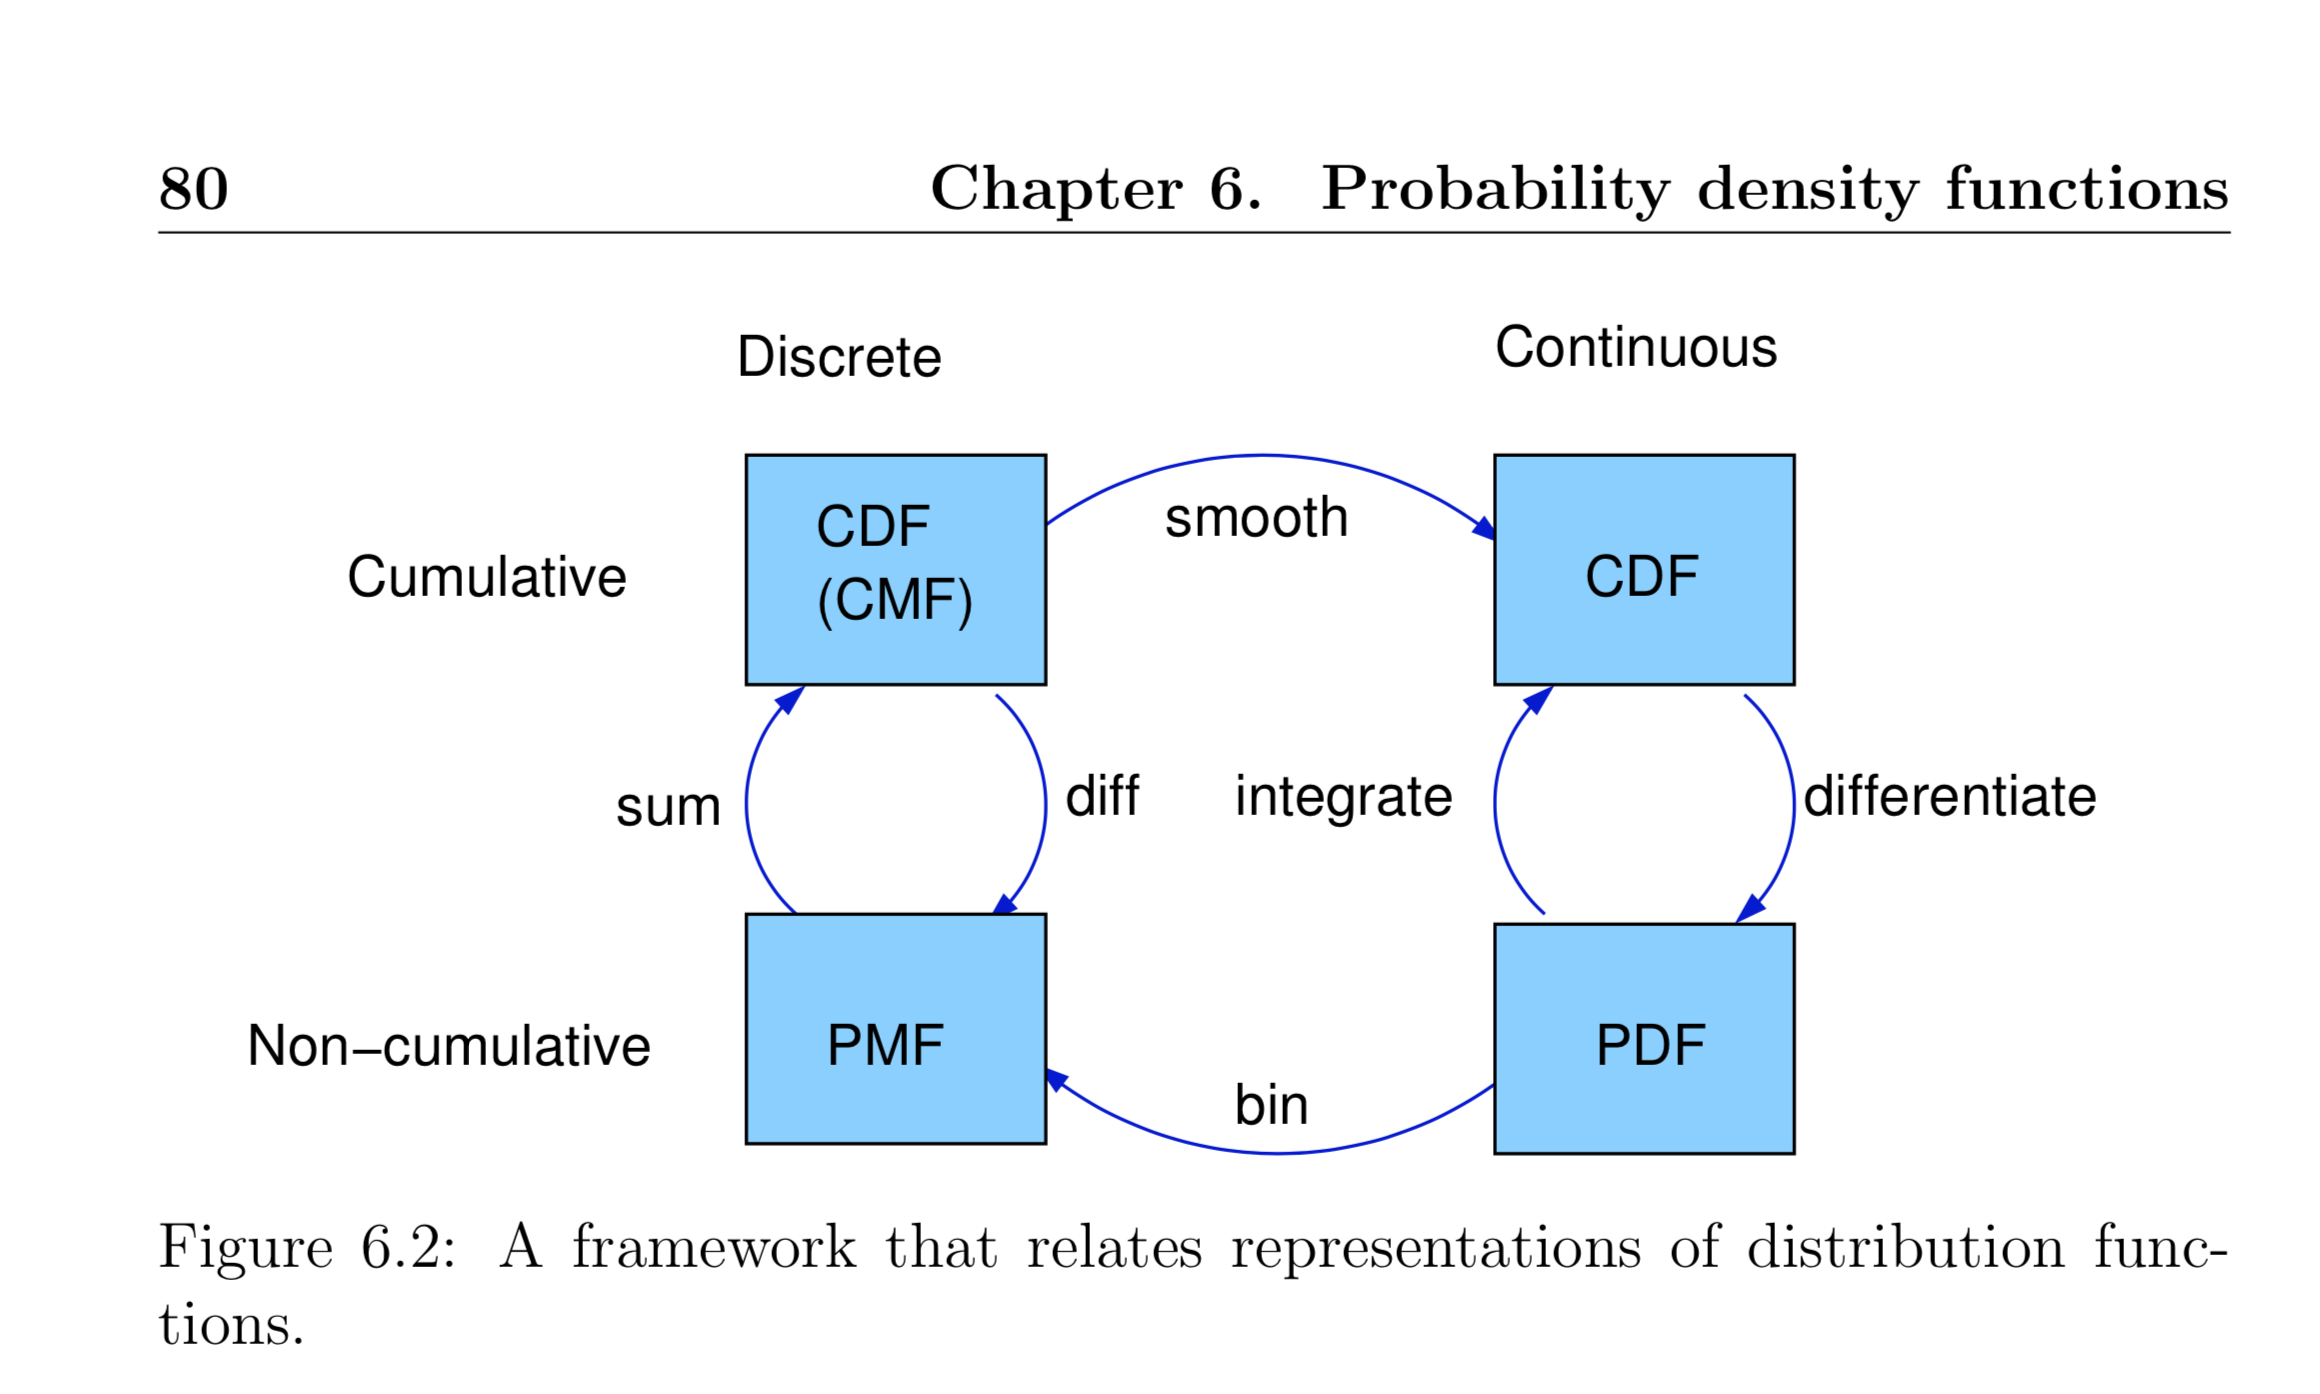

The opposite of smoothing is discretizing, or quantizing. If you evaluate a PDF at discrete points, you can generate a PMF that is an approximation of the PDF. You can get a better approximation using numerical integration.


Skewness is a property that describes the shape of a distribution. If the distribution is symmetric around its central tendency, it is unskewed. If the values extend farther to the right, it is “right skewed” and if the values extend left, it is “left skewed.”
In practice, computing sample skewness is usually not a good idea. If there are any outliers, they have a disproportionate effect on g1.
Another way to evaluate the asymmetry of a distribution is to look at the relationship between the mean and median. Extreme values have more effect on the mean than the median, so in a distribution that skews left, the mean is less than the median. In a distribution that skews right, the mean is greater.
Pearson’s median skewness coefficient is a measure of skewness based on the difference between the sample mean and median:    
$gp = 3(x ̄ − m)/S$    

• Probability density function (PDF): The derivative of a continuous CDF, a function that maps a value to its probability density.
• Probability density: A quantity that can be integrated over a range of values to yield a probability. If the values are in units of cm, for example, probability density is in units of probability per cm.
• Kernel density estimation (KDE): An algorithm that estimates a PDF based on a sample.
• discretize: To approximate a continuous function or distribution with a discrete function. The opposite of smoothing.
• raw moment: A statistic based on the sum of data raised to a power.
• central moment: A statistic based on deviation from the mean, raised to a power.


### Relationships between variables
Jittering reduces the visual effect of rounding and makes the shape of the relationship clearer. But in general you should only jitter data for purposes of visualization and avoid using jittered data for analysis.
Even with jittering, this is not the best way to represent the data. There are many overlapping points, which hides data in the dense parts of the figure and gives disproportionate emphasis to outliers. This effect is called saturation.
Overlapping data points look darker, so darkness is proportional to density. In this version of the plot we can see two details that were not apparent before: vertical clusters at several heights and a horizontal line near 90 kg or 200 pounds. Since this data is based on self-reports in pounds, the most likely explanation is that some respondents reported rounded values.

Using transparency works well for moderate-sized datasets, but this figure only shows the first 5000 records in the BRFSS, out of a total of 414 509.
To handle larger datasets, another option is a hexbin plot, which divides the graph into hexagonal bins and colors each bin according to how many data points fall in it.
Scatter plots provide a general impression of the relationship between vari- ables, but there are other visualizations that provide more insight into the nature of the relationship.

NumPy and pandas provide functions for binning data:


In [ ]:
df = df.dropna(subset=['htm3', 'wtkg2'])
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

So, for example, we can print the number of rows in each group like this:

In [ ]:

for i, group in groups:
    print(i, len(group))
    
heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]
#Finally, we can plot percentiles of weight versus height:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(heights, weights, label=label)

### Correlation
A correlation is a statistic intended to quantify the strength of the rela-
tionship between two variables.
A challenge in measuring correlation is that the variables we want to compare are often not expressed in the same units. And even if they are in the same units, they come from different distributions.
There are two common solutions to these problems:
1. Transform each value to a standard scores, which is the number of standard deviations from the mean. This transform leads to the “Pearson product-moment correlation coefficient.”
2. Transform each value to its rank, which is its index in the sorted list of values. This transform leads to the “Spearman rank correlation coefficient.”


If X is a series of n values, xi, we can convert to standard scores by sub- tracting the mean and dividing by the standard deviation: zi = (xi − μ)/σ.
The numerator is a deviation: the distance from the mean. Dividing by σ standardizes the deviation, so the values of Z are dimensionless (no units) and their distribution has mean 0 and variance 1.
If X is normally distributed, so is Z. But if X is skewed or has outliers, so does Z; in those cases, it is more robust to use percentile ranks. If we compute a new variable, R, so that ri is the rank of xi, the distribution of R is uniform from 1 to n, regardless of the distribution of X.

### Covariance
Covariance is a measure of the tendency of two variables to vary together.
If we have two series, X and Y , their deviations from the mean are dxi = xi − x ̄
dyi = yi − y ̄
where x ̄ is the sample mean of X and y ̄ is the sample mean of Y. If X and
Y vary together, their deviations tend to have the same sign.
If we multiply them together, the product is positive when the deviations have the same sign and negative when they have the opposite sign. So adding up the products gives a measure of the tendency to vary together.
 Covariance is the mean of these products: Cov(X,Y)=1 dxi dyi
 n
where n is the length of the two series (they have to be the same length).
If you have studied linear algebra, you might recognize that Cov is the dot product of the deviations, divided by their length. So the covariance is maximized if the two vectors are identical, 0 if they are orthogonal, and
98 Chapter 7. Relationships between variables
negative if they point in opposite directions.

### Pearson’s correlation
Covariance is useful in some computations, but it is seldom reported as a summary statistic because it is hard to interpret. Among other problems, its units are the product of the units of X and Y . For example, the covari- ance of weight and height in the BRFSS dataset is 113 kilogram-centimeters, whatever that means.
One solution to this problem is to divide the deviations by the standard deviation, which yields standard scores, and compute the product of standard
 scores:
$p i = (x_i − x ̄ ) ( y_i − y ̄ ) / SX*SY$

### Nonlinear relationships
If Pearson’s correlation is near 0, it is tempting to conclude that there is no relationship between the variables, but that conclusion is not valid. Pear- son’s correlation only measures linear relationships. If there’s a nonlinear relationship, ρ understates its strength.
The top row shows linear relationships with a range of correlations; you can use this row to get a sense of what different values of ρ look like. The second row shows perfect correlations with a range of slopes, which demonstrates that correlation is unrelated to slope (we’ll talk about estimating slope soon). The third row shows variables that are clearly related, but because the rela- tionship is nonlinear, the correlation coefficient is 0.
The moral of this story is that you should always look at a scatter plot of your data before blindly computing a correlation coefficient.

### Correlation and causation
If variables A and B are correlated, there are three possible explanations: A causes B, or B causes A, or some other set of factors causes both A and B. These explanations are called “causal relationships”.
So what can you do to provide evidence of causation?
1. Use time. If A comes before B, then A can cause B but not the other way around (at least according to our common understanding of causa- tion). The order of events can help us infer the direction of causation, but it does not preclude the possibility that something else causes both A and B.
2. Use randomness. If you divide a large sample into two groups at ran- dom and compute the means of almost any variable, you expect the difference to be small. If the groups are nearly identical in all variables but one, you can eliminate spurious relationships.
This works even if you don’t know what the relevant variables are, but it works even better if you do, because you can check that the groups are identical.

### The estimation game
Let’s play a game. I think of a distribution, and you have to guess what it is. I’ll give you two hints: it’s a normal distribution, and here’s a random sample drawn from it:
[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]
What do you think is the mean parameter, μ, of this distribution?
One choice is to use the sample mean, x ̄, as an estimate of μ. In this example, x ̄ is 0.155, so it would be reasonable to guess μ = 0.155. This process is called estimation, and the statistic we used (the sample mean) is called an estimator.
Using the sample mean to estimate μ is so obvious that it is hard to imagine a reasonable alternative. But suppose we change the game by introducing outliers.

It’s a normal distribution, and here’s a sam- ple that was collected by an unreliable surveyor who occasionally puts the decimal point in the wrong place.
ow what’s your estimate of μ? If you use the sample mean, your guess is -35.12. Is that the best choice? What are the alternatives?
One option is to identify and discard outliers, then compute the sample mean of the rest. Another option is to use the median as an estimator.
Which estimator is best depends on the circumstances (for example, whether there are outliers) and on what the goal is. Are you trying to minimize errors, or maximize your chance of getting the right answer?
If there are no outliers, the sample mean minimizes the mean squared error (MSE). That is, if we play the game many times, and each time compute the error x ̄ − μ, the sample mean minimizes
$MSE = 1/2( x ̄ − μ )^2$
Where m is the number of times you play the estimation game, not to be confused with n, which is the size of the sample used to compute x ̄.

$S^2 = 1/n( xi − x ̄ )^2$
For large samples, S2 is an adequate estimator, but for small samples it tends to be too low. Because of this unfortunate property, it is called a biased estimator. An estimator is unbiased if the expected total (or mean) error, after many iterations of the estimation game, is 0.
Fortunately, there is another simple statistic that is an unbiased estimator
  of σ2:
For an explanation of why S2 is biased, and a proof that Sn2−1 is unbiased,
see http://wikipedia.org/wiki/Bias_of_an_estimator.


### Sampling distribution
In each iteration, we choose n values from a normal distribution with the given parameters, and compute the sample mean, xbar. We run 1000 simu- lations and then compute the distribution, cdf, of the estimates. The result is shown in Figure 8.1. This distribution is called the sampling distribu- tion of the estimator. It shows how much the estimates would vary if we ran the experiment over and over.
The mean of the sampling distribution is pretty close to the hypothetical value of μ, which means that the experiment yields the right answer, on average. After 1000 tries, the lowest result is 82 kg, and the highest is 98 kg. This range suggests that the estimate might be off by as much as 8 kg.
There are two common ways to summarize the sampling distribution:
• Standard error (SE) is a measure of how far we expect the estimate to be off, on average. For each simulated experiment, we compute the error, x ̄ − μ, and then compute the root mean squared error (RMSE). In this example, it is roughly 2.5 kg.
• A confidence interval (CI) is a range that includes a given fraction of the sampling distribution. For example, the 90% confidence interval is the range from the 5th to the 95th percentile. In this example, the 90% CI is (86, 94) kg.

Standard errors and confidence intervals are the source of much confusion:
• People often confuse standard error and standard deviation. Remember that standard deviation describes variability in a measured quantity; in this example, the standard deviation of gorilla weight is 7.5 kg. Standard error describes variability in an estimate. In this example, the standard error of the mean, based on a sample of 9 measurements, is 2.5 kg.
One way to remember the difference is that, as sample size increases, standard error gets smaller; standard deviation does not.
• People often think that there is a 90% probability that the actual pa- rameter, μ, falls in the 90% confidence interval. Sadly, that is not true. If you want to make a claim like that, you have to use Bayesian methods (see my book, Think Bayes).
The sampling distribution answers a different question: it gives you a sense of how reliable an estimate is by telling you how much it would vary if you ran the experiment again.
It is important to remember that confidence intervals and standard errors only quantify sampling error; that is, error due to measuring only part of the population. The sampling distribution does not account for other sources of error, notably sampling bias and measurement error, which are the topics of the next section.

### Exponential distributions
Let’s play one more round of the estimation game. I’m thinking of a distri- bution. It’s an exponential distribution, and here’s a sample:
[5.384, 4.493, 19.198, 2.790, 6.122, 12.844]
What do you think is the parameter, λ, of this distribution?
In general, the mean of an exponential distribution is 1/λ, so working back- wards, we might choose    
$L = 1 / x ̄$